# Analysis 4
# A comparative analysis on population and mortality across income level between 1993 and 2013.
- Get data for countries based on their income types
- Get data based on indicators for population and mortality.
- Plot data using Seaborn factorplot


In [71]:
# import pandas and read csv 

import pandas as pd
import numpy as np

worldBankData = pd.read_csv("/Users/vega/Downloads/WDI_csv/WDI_Data.csv")


In [72]:
#Create function to get the specific indicator names and countries
def get_countries():
	cntry = worldBankData[['Country Name']]
	cntry = cntry.sort_values(by='Country Name')
	countries = cntry['Country Name'].tolist()
	return countries
def get_indicators():
	ind = worldBankData[['Indicator Name']]
	ind = ind.sort_values(by='Indicator Name')
	indicators = ind['Indicator Name'].tolist()
	return indicators
def get_natnlIncome_countries():
	all_cntry = get_countries()
	incomeCountry = []
	for cntry in all_cntry:
		if ('income' in cntry.lower()):
			incomeCountry.append(cntry)
	return set(incomeCountry)
def get_population_indicators():
	all_ind = get_indicators()
	population = []
	for ind in all_ind:
		if ('population density' in ind.lower()):
			population.append(ind)
	return set(population)

#print(get_natnlIncome_indicators())
#Based on the indicators we use the below values for our analysis.
indicators = ['High income','Low & middle income','Low income','Lower middle income','Middle income','Upper middle income']

# Get statistics on popuation rate for these grouped countries
#print(get_population_indicators())
#Based on the indicators available, we shall use 'Population density (people per sq. km of land area'

In [81]:
#Data only for year 2000 & 2012
col_list = ['Country Name','Indicator Name','2000','2012']

worldBankData1 = worldBankData[col_list]
worldBankDataPopulation = worldBankData1.loc[(worldBankData1['Indicator Name'] == 'Population density (people per sq. km of land area)') & (worldBankData1['Country Name'].isin(indicators))]
worldBankDataPopulation = worldBankDataPopulation.set_index(['Country Name','Indicator Name']).stack().unstack(1)
worldBankDataPopulation = worldBankDataPopulation.reset_index()
new_columns = worldBankDataPopulation.columns.values;
worldBankDataPopulation.columns = ['Country Name', 'Year','Population density (people per sq. km of land area)']



,Country Name,Year,Population density (people per sq. km of land area)
0,High income,2000,30.642333
1,High income,2012,33.261534
2,Low & middle income,2000,53.251174
3,Low & middle income,2012,62.570375
4,Low income,2000,31.660371


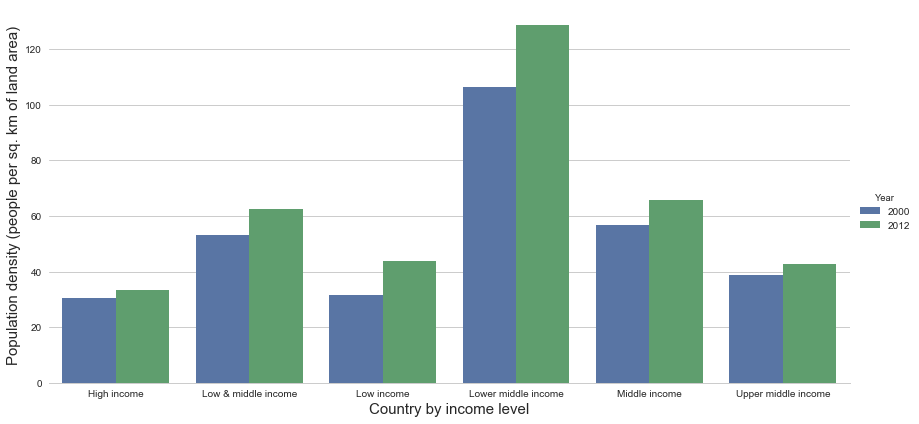

In [181]:
#import seaborn to plot population density 
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x = "Country Name", y="Population density (people per sq. km of land area)", hue="Year", data=worldBankDataPopulation,
                    kind="bar",size=6, aspect=2)
g.despine(left=True)
g.set_xlabels("Country by income level",size=15)

g.set_ylabels("Population density (people per sq. km of land area)",size=15)
g.savefig("ana_4.1.png")


In [178]:
def get_diseases_indicators():
	all_ind = get_indicators()
	population = []
	for ind in all_ind:
		if ('death' in ind.lower()):
			population.append(ind)
	return set(population)

#print(get_diseases_indicators())
#Based on the indicators we use the below values for our analysis.
deathIndicators = ['Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)','Cause of death, by injury (% of total)','Cause of death, by non-communicable diseases (% of total)']


In [118]:
#Use Data only for year 2000
col_list = ['Country Name','Indicator Name','2000']

worldBankData2 = worldBankData[col_list]
worldBankDeaths = worldBankData2.loc[(worldBankData2['Indicator Name'].isin(deathIndicators)) & (worldBankData2['Country Name'].isin(indicators))]



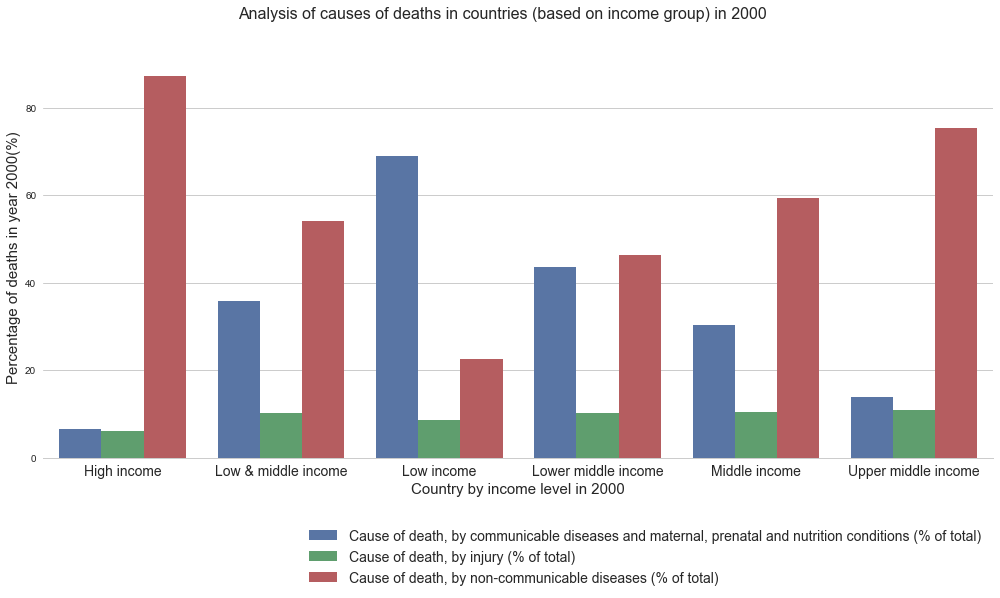

In [182]:
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(font_scale=1.4)
sns.set(style="whitegrid")

g = sns.factorplot(x = "Country Name", y="2000", hue="Indicator Name", data=worldBankDeaths,
                    kind="bar",size=7, aspect=2,legend = False)
g.despine(left=True)
g.set_xlabels("Country by income level in 2000",size=15)
g.set_xticklabels(size=14)

g.set_ylabels("Percentage of deaths in year 2000(%)",size=15)
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.35), fontsize=14)

g.fig.suptitle("Analysis of causes of deaths in countries (based on income group) in 2000", size=16)
g.fig.subplots_adjust(top=.88)
g.savefig("ana_4.2.png")


# Conclusion
- Based on the first analysis we can conclude that "Lower middle income countries" have a much higher population density as compared to other income levels
-  Based on the second analysis we can conclude that "Low income countries" have maximum deaths due to communicable diseases as compared to other income levels and "High income countries" have maximum deaths due to non-communicable diseases as compared to other income levels.